#Age Classification

##Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc

##Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/mainDataset/ageDataset.csv')
gc.collect()

11

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        8000 non-null   int64 
 1   age               8000 non-null   int64 
 2   text              8000 non-null   object
 3   Age_divide        8000 non-null   object
 4   encoded_category  8000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 312.6+ KB


##Data Visualization

In [ ]:
temp1 = dataset.query('encoded_category == 0') #aged
temp2 = dataset.query('encoded_category == 1') #underaged

In [ ]:
ind = temp2.index[temp2['text'].apply(lambda x: len(str(x).split())) < 500 ]

In [ ]:
ind

Int64Index([  11,   12,   13,   16,   23,   24,   30,   31,   32,   39,
            ...
            7979, 7980, 7981, 7985, 7986, 7989, 7992, 7996, 7998, 7999],
           dtype='int64', length=3085)

In [ ]:
temp2.loc[39].text

"       Today was a good day... Starting at about 10:30 last night... hee hee. Rose Dillon and I moused Chantele. {again} and we ate lots and lots and lots of chocolate cake. {ca-ake.} In Newspaper we played 20 Questions... that was fun. I love Newspaper. I really do. {you too} and we practiced for mass today, and sang my lil' heart out.  Singing makes me in a good mood... unless I'm in a crappy mood.  .:giggle:.  Yesterday Mr. Thomas asked me if I would do journalism practicum next year.  That was cool.     "

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


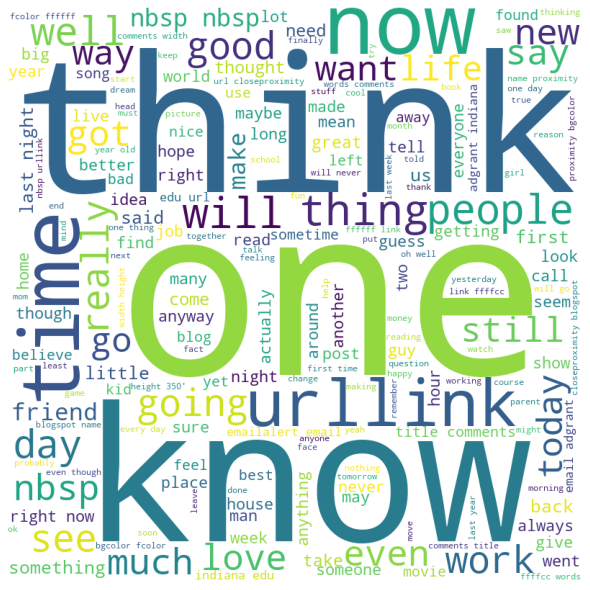

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in temp1.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

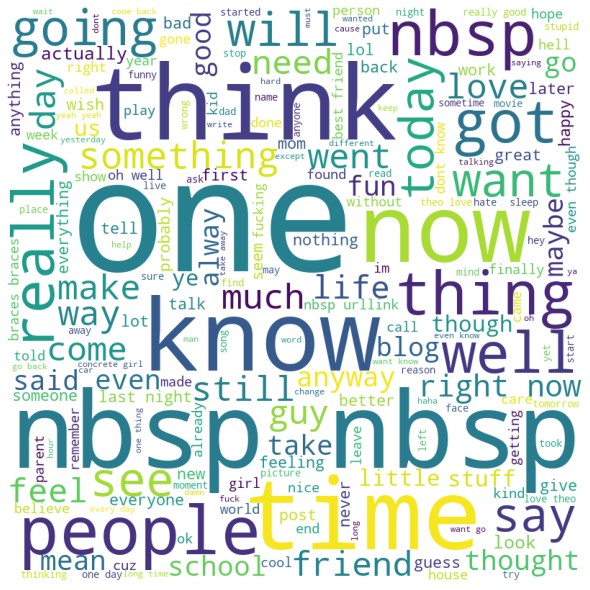

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in temp2.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        8000 non-null   int64 
 1   age               8000 non-null   int64 
 2   text              8000 non-null   object
 3   Age_divide        8000 non-null   object
 4   encoded_category  8000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 312.6+ KB


##Data Cleaning

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        8000 non-null   int64 
 1   age               8000 non-null   int64 
 2   text              8000 non-null   object
 3   Age_divide        8000 non-null   object
 4   encoded_category  8000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 312.6+ KB


In [ ]:
dataset

,Unnamed: 0,age,text,Age_divide,encoded_category
0,0,23,i read a the abbot's blog about soulmat...,Aged,0
1,1,26,Another long evening at the casino.... ...,Aged,0
2,2,17,I have now bridged the gap between my i...,UnderAged,1
3,3,23,"Dont Marry an Airtel girl, she will...",Aged,0
4,4,23,Life in the NYC certainly has...,Aged,0
...,...,...,...,...,...
7995,7995,36,Help a Poet Pandylanders: pleas...,Aged,0
7996,7996,17,"The first is from Carrie Fisher, who, ...",UnderAged,1
7997,7997,35,This kind of thing continues to bot...,Aged,0
7998,7998,17,Yeah I know that the 6th Form Ball...,UnderAged,1


In [ ]:
y = dataset.iloc[:, 4].values
gc.collect()

200

In [ ]:
for i in range(0, 8000):
 text = re.sub('[^a-zA-Z]',' ',dataset['text'][i])
 text = text.lower()
 text = text.split()
 ps = PorterStemmer()
 text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
 text = ' '.join(text)
 corpus.append(text)

In [ ]:
corpus

##Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',min_df = 0.1, max_df = 0.80, ngram_range = (1, 3))
#tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
gc.collect()

0

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.20, random_state=0)

##Training and Testing

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score

In [ ]:
def display_metrics(clf, Xtest, Ytest, Ypred):
    print('Confusion Matrix:\n',confusion_matrix(Ytest, Ypred))
    cm = confusion_matrix(Ytest, Ypred, normalize='all')
    cmd = ConfusionMatrixDisplay(cm, display_labels=['over 18','under 18'])
    cmd.plot(cmap=plt.cm.Blues)
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred))
    print('Precision score: ', precision_score(Ytest, Ypred))
    print('Recall score: ', recall_score(Ytest, Ypred))
    print('Area Under the Curve (AUC) using the trapezoidal rule:')
    metrics.plot_roc_curve(clf, Xtest, Ytest) 
    plt.show()

In [ ]:
def build_model_train(X_train, y_train, model='lr'):
    if model == 'lr':
        model = LogisticRegression(random_state=0,solver='liblinear',max_iter=10)
       

    elif model == 'svm':
        model = SVC(kernel = 'rbf',random_state = 0)
        
      
    elif model == 'nbayes':
        model = MultinomialNB()
        
        
    elif model == 'dt':
       model = DecisionTreeClassifier(criterion='entropy',random_state=0)
       
      
    elif model == 'rf':
        model = RandomForestClassifier(n_estimators=20, criterion='entropy',random_state=0)
        
        
    elif model == 'knn':
        model = KNeighborsClassifier(n_neighbors=2,p=3)
        
              
    return model

In [ ]:
gc.collect()

100

##Training Performance




**displaying  metrics for the mode LogisticRegression(max_iter=10, random_state=0, solver='liblinear')

Confusion Matrix:
 [[2931  707]
 [1205 1557]]
Accuracy score:  0.70125
F1 score:  0.6195781933943494
Precision score:  0.6877208480565371
Recall score:  0.5637219406227372
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


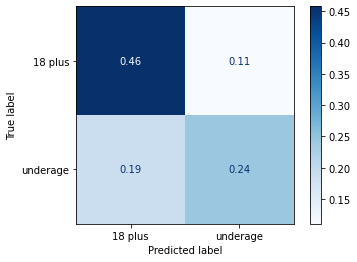

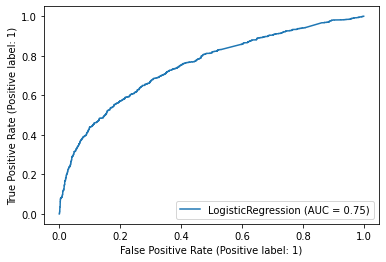



**displaying  metrics for the mode SVC(random_state=0)

Confusion Matrix:
 [[3576   62]
 [ 278 2484]]
Accuracy score:  0.946875
F1 score:  0.9359457422758101
Precision score:  0.9756480754124116
Recall score:  0.8993482983345402
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


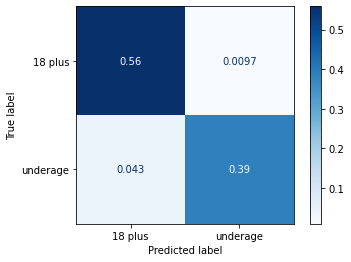

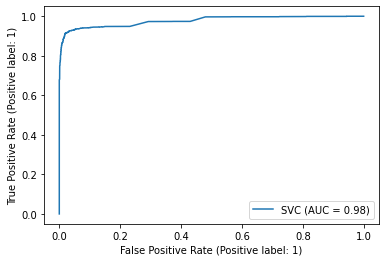



**displaying  metrics for the mode MultinomialNB()

Confusion Matrix:
 [[3345  293]
 [1742 1020]]
Accuracy score:  0.68203125
F1 score:  0.5006134969325153
Precision score:  0.7768469154607769
Recall score:  0.36929761042722664
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


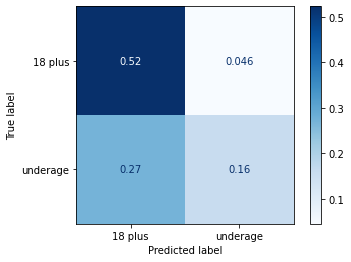

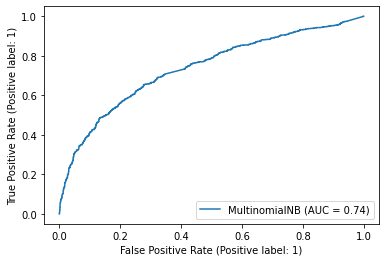



**displaying  metrics for the mode DecisionTreeClassifier(criterion='entropy', random_state=0)

Confusion Matrix:
 [[3626   12]
 [ 161 2601]]
Accuracy score:  0.97296875
F1 score:  0.9678139534883721
Precision score:  0.9954075774971297
Recall score:  0.941708906589428
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


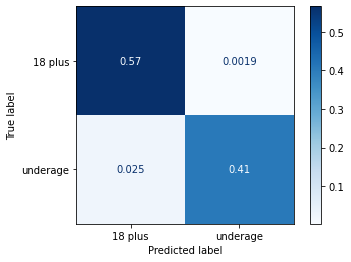

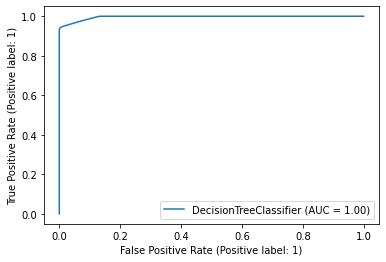



**displaying  metrics for the mode RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

Confusion Matrix:
 [[3622   16]
 [ 158 2604]]
Accuracy score:  0.9728125
F1 score:  0.967670011148272
Precision score:  0.9938931297709923
Recall score:  0.942795076031861
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


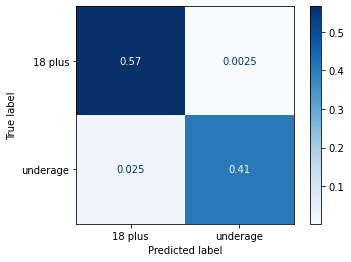

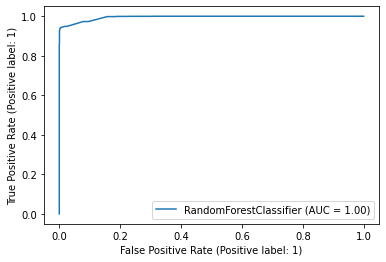



**displaying  metrics for the mode KNeighborsClassifier(n_neighbors=2, p=3)

Confusion Matrix:
 [[3634    4]
 [ 391 2371]]
Accuracy score:  0.93828125
F1 score:  0.9231068717150087
Precision score:  0.9983157894736842
Recall score:  0.8584359160028965
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


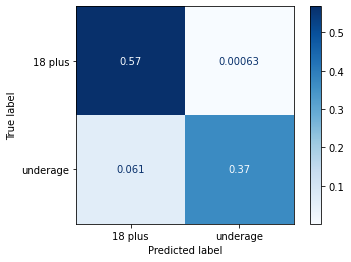

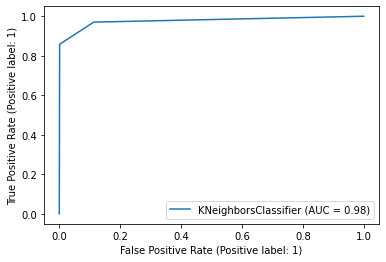

In [ ]:
models = ['lr', 'svm', 'nbayes','dt','rf','knn']
for model in models:
    model2 = build_model_train(X_train, y_train, model=model)
    model2.fit(X_train, y_train)
    y_pred = model2.predict(X_train)
    print("\n")
    print(f"**displaying  metrics for the mode {model2}\n")
    display_metrics(model2, X_train, y_train, y_pred)

##Testing Performance



**displaying  metrics for the mode LogisticRegression(max_iter=10, random_state=0, solver='liblinear')

Confusion Matrix:
 [[739 198]
 [318 345]]
Accuracy score:  0.6775
F1 score:  0.572139303482587
Precision score:  0.6353591160220995
Recall score:  0.5203619909502263
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


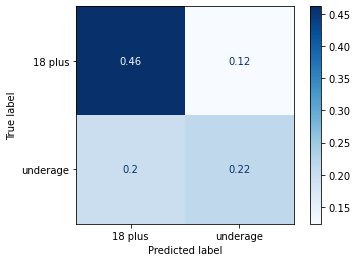

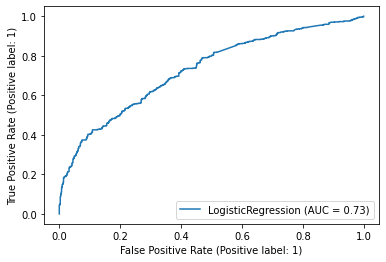



**displaying  metrics for the mode SVC(random_state=0)

Confusion Matrix:
 [[895  42]
 [124 539]]
Accuracy score:  0.89625
F1 score:  0.8665594855305466
Precision score:  0.927710843373494
Recall score:  0.8129713423831071
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


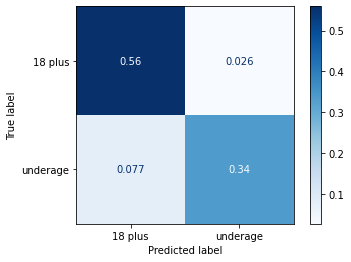

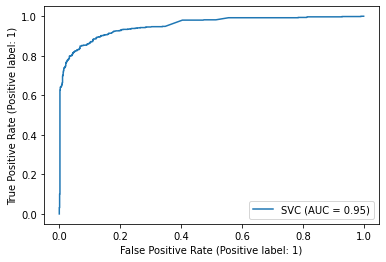



**displaying  metrics for the mode MultinomialNB()

Confusion Matrix:
 [[862  75]
 [432 231]]
Accuracy score:  0.683125
F1 score:  0.4767801857585139
Precision score:  0.7549019607843137
Recall score:  0.34841628959276016
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


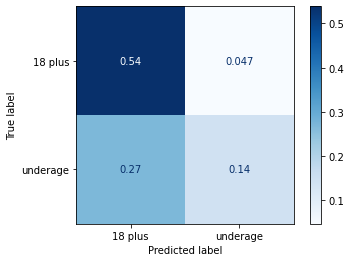

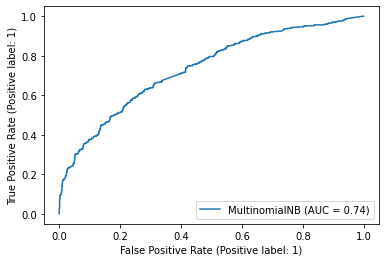



**displaying  metrics for the mode DecisionTreeClassifier(criterion='entropy', random_state=0)

Confusion Matrix:
 [[881  56]
 [ 88 575]]
Accuracy score:  0.91
F1 score:  0.8887171561051005
Precision score:  0.9112519809825673
Recall score:  0.8672699849170438
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


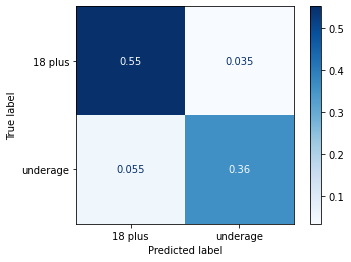

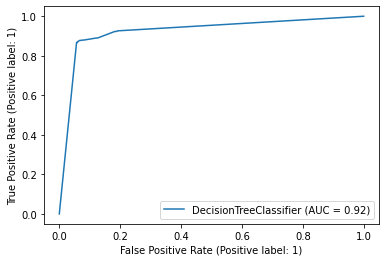



**displaying  metrics for the mode RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

Confusion Matrix:
 [[897  40]
 [ 99 564]]
Accuracy score:  0.913125
F1 score:  0.8902920284135754
Precision score:  0.9337748344370861
Recall score:  0.8506787330316742
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


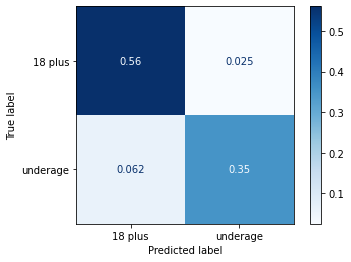

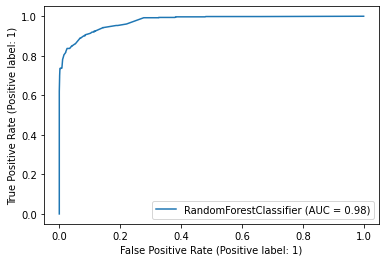



**displaying  metrics for the mode KNeighborsClassifier(n_neighbors=2, p=3)

Confusion Matrix:
 [[890  47]
 [170 493]]
Accuracy score:  0.864375
F1 score:  0.8196176226101413
Precision score:  0.912962962962963
Recall score:  0.7435897435897436
Area Under the Curve (AUC) using the trapezoidal rule:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


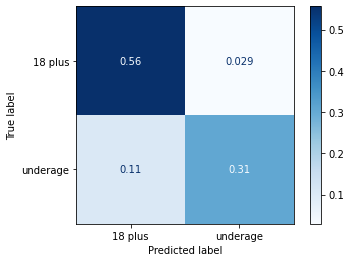

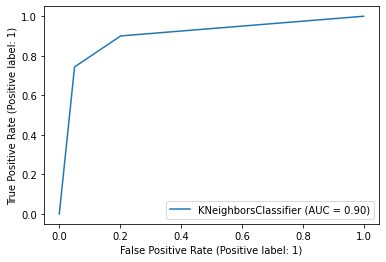

In [ ]:
models = ['lr', 'svm', 'nbayes','dt','rf','knn']
for model in models:
    model = build_model_train(X_train, y_train, model=model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics(model, X_test, y_test, y_pred)
    